In [1]:
import torch
from torchvision import datasets, transforms
import numpy as np
transform=transforms.Compose([
transforms.ToTensor(),
transforms.Normalize((0.1307,), (0.3081,))
])

dataset = datasets.MNIST('./mnist', train=True, download=True, transform=transform)
dataset_train, dataset_valid = torch.utils.data.random_split(dataset, [50000, 10000])
dataset_test = datasets.MNIST('./mnist', train=False, transform=transform)


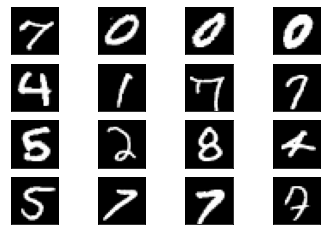

In [2]:
import matplotlib.pyplot as plt
import torch.nn.functional as F

fig = plt.figure()
for i in range(16):
    ax = fig.add_subplot(4, 4, i + 1)
    ax.set_xticks(())
    ax.set_yticks(())
    ax.imshow(dataset_train[i][0].reshape(28, 28), cmap='Greys_r')



In [3]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 25, 12, stride=2)
        self.conv2 = nn.Conv2d(25, 64, 5, stride=1)
        self.pool = nn.MaxPool2d(2, stride=1)
        self.fc1 = nn.Linear(64 * 16, 1024)
        self.dropout = nn.Dropout(p=0.2)
        self.fc2 = nn.Linear(1024, 10)
        
    def forward(self,x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

net = Net()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [4]:
params = {'batch_size': 64,
          'shuffle': True,
          'num_workers': 1}
training_generator = torch.utils.data.DataLoader(dataset_train, **params)


def test_accuracy():
    cnt = 0
    ok = 0
    test_generator = torch.utils.data.DataLoader(dataset_test, **params)
    with torch.set_grad_enabled(False):
        for batch, labels in test_generator:
            outs = net(batch)
            predictions = np.argmax(outs, axis=1)
            for i in range(len(labels)):
                if predictions[i] == labels[i]:
                    ok+=1
                cnt += 1
    return ok/cnt

def train_accuracy():
    cnt = 0
    ok = 0
    test_generator = torch.utils.data.DataLoader(dataset_train, **params)
    with torch.set_grad_enabled(False):
        for batch, labels in test_generator:
            outs = net(batch)
            predictions = np.argmax(outs, axis=1)
            for i in range(len(labels)):
                if predictions[i] == labels[i]:
                    ok+=1
                cnt += 1
    return ok/cnt


print("Starting training")

for epoch in range(20):
    for batch, labels in training_generator:
        optimizer.zero_grad()
        
        outputs = net(batch)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    
    print(epoch + 1, "epochs done")
    print("test accuracy: ", test_accuracy())
    print("train accuracy: ", train_accuracy())
    

Starting training


/usr/local/Anaconda3/lib/python3.8/site-packages/torch/autograd/__init__.py:130: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /opt/conda/conda-bld/pytorch_1603729009598/work/c10/cuda/CUDAFunctions.cpp:100.)
  Variable._execution_engine.run_backward(


1 epochs done
test accuracy:  0.9333
train accuracy:  0.92722
2 epochs done
test accuracy:  0.9584
train accuracy:  0.95458
3 epochs done
test accuracy:  0.9684
train accuracy:  0.96766
4 epochs done
test accuracy:  0.9749
train accuracy:  0.9737
5 epochs done
test accuracy:  0.9768
train accuracy:  0.97864
6 epochs done
test accuracy:  0.978
train accuracy:  0.97928
7 epochs done
test accuracy:  0.9806
train accuracy:  0.98306
8 epochs done
test accuracy:  0.9826
train accuracy:  0.98462
9 epochs done
test accuracy:  0.9829
train accuracy:  0.98596
10 epochs done
test accuracy:  0.9825
train accuracy:  0.98714
11 epochs done
test accuracy:  0.9841
train accuracy:  0.98848
12 epochs done
test accuracy:  0.9861
train accuracy:  0.99006
13 epochs done
test accuracy:  0.985
train accuracy:  0.98962
14 epochs done
test accuracy:  0.9875
train accuracy:  0.99152
15 epochs done
test accuracy:  0.9884
train accuracy:  0.99202
16 epochs done
test accuracy:  0.9871
train accuracy:  0.99252
17 e

In [5]:

for epoch in range(40):
    for batch, labels in training_generator:
        optimizer.zero_grad()
        
        outputs = net(batch)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    
    print(epoch + 1, "epochs done")
    print("test accuracy: ", test_accuracy())
    #print("train accuracy: ", train_accuracy())
 

1 epochs done
test accuracy:  0.988
2 epochs done
test accuracy:  0.988
3 epochs done
test accuracy:  0.9887
4 epochs done
test accuracy:  0.9879
5 epochs done
test accuracy:  0.9874
6 epochs done
test accuracy:  0.9874
7 epochs done
test accuracy:  0.9883
8 epochs done
test accuracy:  0.988
9 epochs done
test accuracy:  0.9882
10 epochs done
test accuracy:  0.9882
11 epochs done
test accuracy:  0.987
12 epochs done
test accuracy:  0.9885
13 epochs done
test accuracy:  0.9876
14 epochs done
test accuracy:  0.9887
15 epochs done
test accuracy:  0.9886
16 epochs done
test accuracy:  0.9879
17 epochs done
test accuracy:  0.9884
18 epochs done
test accuracy:  0.9893
19 epochs done
test accuracy:  0.9874
20 epochs done
test accuracy:  0.9882
21 epochs done
test accuracy:  0.9877
22 epochs done
test accuracy:  0.9882
23 epochs done
test accuracy:  0.9883
24 epochs done
test accuracy:  0.9885
25 epochs done
test accuracy:  0.9887
26 epochs done
test accuracy:  0.9888
27 epochs done
test accur

In [7]:

for epoch in range(40):
    for batch, labels in training_generator:
        optimizer.zero_grad()

        
        outputs = net(batch)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    
    print(epoch + 1, "epochs done")
    print("test accuracy: ", test_accuracy())
    #print("train accuracy: ", train_accuracy())

torch.Size([64, 1, 28, 28])
torch.Size([64])
torch.Size([64, 1, 28, 28])
torch.Size([64])
torch.Size([64, 1, 28, 28])
torch.Size([64])
torch.Size([64, 1, 28, 28])
torch.Size([64])
torch.Size([64, 1, 28, 28])
torch.Size([64])
torch.Size([64, 1, 28, 28])
torch.Size([64])
torch.Size([64, 1, 28, 28])
torch.Size([64])
torch.Size([64, 1, 28, 28])
torch.Size([64])
torch.Size([64, 1, 28, 28])
torch.Size([64])
torch.Size([64, 1, 28, 28])
torch.Size([64])
torch.Size([64, 1, 28, 28])
torch.Size([64])
torch.Size([64, 1, 28, 28])
torch.Size([64])
torch.Size([64, 1, 28, 28])
torch.Size([64])
torch.Size([64, 1, 28, 28])
torch.Size([64])
torch.Size([64, 1, 28, 28])
torch.Size([64])
torch.Size([64, 1, 28, 28])
torch.Size([64])
torch.Size([64, 1, 28, 28])
torch.Size([64])
torch.Size([64, 1, 28, 28])
torch.Size([64])
torch.Size([64, 1, 28, 28])
torch.Size([64])
torch.Size([64, 1, 28, 28])
torch.Size([64])
torch.Size([64, 1, 28, 28])
torch.Size([64])
torch.Size([64, 1, 28, 28])
torch.Size([64])
torch.Size

KeyboardInterrupt: 